In [24]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
fake_data = pd.read_csv("Fake.csv")
real_data = pd.read_csv("True.csv")

In [26]:
fake_data["class"] = 0
real_data["class"] = 1

In [27]:
fake_data.shape, real_data.shape

((23481, 5), (21417, 5))

Combine datasets

In [28]:

df = pd.concat([fake_data,real_data], ignore_index=True)
df = df[['title', 'text', 'class']]

# Combine title and text
df['content'] = df['title'] + " " + df['text']

In [29]:
df = df.sample(frac =1)

In [30]:
df.head()

,title,text,class,content
5247,‘White Lives Matter’ Rally Breaks Out In Chao...,As many of us could have predicted would be th...,0,‘White Lives Matter’ Rally Breaks Out In Chao...
8979,Patriot Can’t Wait To Go Fight Gubmint With O...,You know that feeling when you want to overthr...,0,Patriot Can’t Wait To Go Fight Gubmint With O...
16756,HERE IT IS: List Of Democrat Hypocrites Who Vo...,"If you look closely, you might find a few fami...",0,HERE IT IS: List Of Democrat Hypocrites Who Vo...
6791,"Israelis Throw ‘Death To Arabs’ Rally, Thousa...",The state of Israel has been able to cover up ...,0,"Israelis Throw ‘Death To Arabs’ Rally, Thousa..."
29148,U.S. conference on Libya postponed over Trump ...,WASHINGTON (Reuters) - A high-profile conferen...,1,U.S. conference on Libya postponed over Trump ...


Cleaning the text

In [31]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned'] = df['content'].apply(clean_text)

Vectorization

In [32]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned'])
y = df['class']

Train-test split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training Logistic Classifier

In [34]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

Predict and evaluate

In [35]:
y_pred_lr = lr_model.predict(X_test)
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


--- Logistic Regression ---
Accuracy: 0.9898663697104677
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4697
           1       0.99      0.99      0.99      4283

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Training DecisionTree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

Predict and evaluate

In [39]:
y_pred_dt = dt_model.predict(X_test)
print("\n--- Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


--- Decision Tree ---
Accuracy: 0.9930957683741648
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4697
           1       0.99      0.99      0.99      4283

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Confusion matrix

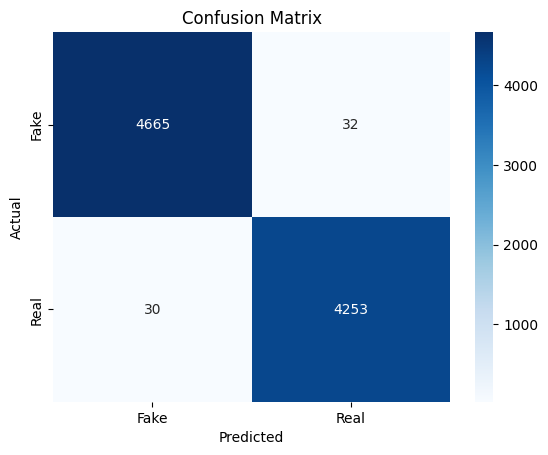

In [79]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Test with input

In [80]:
def predict_news(news):
    cleaned = clean_text(news)
    vectorized = vectorizer.transform([cleaned])
    pred = lr_model.predict(vectorized)[0]
    return "Fake" if pred == 0 else "Real"

news_input = "President Donald Trump called on the U.S. Postal Service on Friday to charge “much more” to ship packages for Amazon (AMZN.O), picking another fight with an online retail giant he has criticized in the past"
print("Prediction:", predict_news(news_input))


Prediction: Real
